# Case # 2 - EDA

## Business Problem

For this case we are going to assume that you are interested on setting an Airbnb rental in [Zurich (Switzerland)](https://en.wikipedia.org/wiki/Zürich) and you want to understand the behavior of the market, what you can expect to charge per night and find any recommendation that can be done on setting this new business. 

## Data Import

### Packages Import

All the packages required for the script  must be imported. For this case, we are going to use Pandas for data analysis and data manipulation ([Pandas Documentation](https://pandas.pydata.org)) and Seaborn and Matplotlib for data visualization ([Seaborn Documentation](https://seaborn.pydata.org/#) and [Matplotlib Documentation](https://matplotlib.org))

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Data Load

All data used on this case is pulished under a [Public Domain](http://creativecommons.org/publicdomain/zero/1.0/) license directly from [Airbnb](http://insideairbnb.com/get-the-data.html).

Data tables are usually accompanied by a data dictionary that explains the content of the information contained in one of the columns and some times provides some business context.
In the case of these data, the dictionary can be obtained at: [Data Dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896)


External data is usually found as a Comma Separated Values (.csv) file. In order to be able to work on it, data needs to be loaded and stored in the script. In this case, as we are using pandas, we use the pandas method [pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to store the information in a Dataframe.
The method used to load the files must be dependent on the type of file that needs to be imported, such as [Excel (.xls)](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) or [JSON (.json)](https://pandas.pydata.org/docs/reference/api/pandas.io.json.read_json.html)

In [2]:
# Use of pandas method read_csv() to load data from a csv data downloaded form Airbnb web page
df = pd.read_csv('/work/indu5000_case_2/Data/listings_zurich_short.csv')

## Basic Data Exploration

Once data is loaded, and before we can actually start working on it, we need to be able to understand the data we are working with. Dataframes objects have some attributes and method that allow us to have an overview of the data stored. 

### DataFrame information

First two attributes are related to the amount of data that we have. [df.size](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html) returns the total number of elements (columns x rows) and [df.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) returns the amount of rows and columns in the dataframe. This gives us an idea of how many data points we have

In [3]:
df.size

28720

In [4]:
df.shape

(1795, 16)

**What can we analyze from the previous information?**

**Answer here**

Then, we go a little bit further and start looking information about the amount of columns and the type of data contained in each column.
Taking into account that, on DataFrames, the characteristics or features of the data are specified on the columns. And each one of the records or events are stored in the rows.  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1795 non-null   int64  
 1   name                            1794 non-null   object 
 2   host_id                         1795 non-null   int64  
 3   host_name                       1757 non-null   object 
 4   neighbourhood_group             1795 non-null   object 
 5   neighbourhood                   1795 non-null   object 
 6   latitude                        1795 non-null   float64
 7   longitude                       1795 non-null   float64
 8   room_type                       1795 non-null   object 
 9   price                           1795 non-null   int64  
 10  minimum_nights                  1795 non-null   int64  
 11  number_of_reviews               1795 non-null   int64  
 12  last_review                     13

**What can we analyze from the previous information?**

**Answer here**

Next step will be to understand the distribution of data by using the method [df.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html). Understand how wide the distibution is (min, max and standard deviation), it's skewness (mean and median) and basic quantiles (25th, 50th and 75th)

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.795000e+03,1.795000e+03,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1368.000000,1795.000000,1795.000000
mean,2.804349e+07,7.743534e+07,47.378917,8.532964,164.431198,6.988858,24.410585,0.918962,12.050696,171.272981
std,1.486341e+07,1.025004e+08,0.018331,0.022337,368.179799,19.892573,53.844259,1.496507,22.614288,137.991053
min,7.328200e+04,4.439100e+04,47.326030,8.473300,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.566355e+07,1.215008e+07,47.366020,8.519980,70.000000,1.000000,1.000000,0.170000,1.000000,44.000000
50%,2.948161e+07,2.450649e+07,47.376360,8.532570,100.000000,2.000000,5.000000,0.430000,2.000000,149.000000
75%,4.221508e+07,1.014697e+08,47.388745,8.548475,159.000000,5.000000,22.000000,1.090000,8.000000,319.000000
max,4.887937e+07,3.942607e+08,47.431290,8.604800,9840.000000,365.000000,761.000000,31.840000,80.000000,365.000000


**What can we analyze from the previous information?**

**Answer here**

If it is necesary, any type quantile can be found and the information can be udes for futher analysis. 

In [35]:
df.quantile([0.9])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0.9,46017974.4,258100271.8,47.40802,8.557748,300.0,14.0,72.0,2.35,40.0,364.0


**What can we analyze from the previous information?**

**Answer here**

## Exploration of Single Features or Variables

But not all the exploration and understanting has to be cuantitative or based on numbers. There are some visualizations that can be used to acquire a better understanting of data such as heatmap, histograms and barplots. 

### Missing Data Exploration

By using [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) on the seaborn package, a plot can be made in order to visualize the missing values. This will allow us to find which columns have missing numbers and which ones have the biggest amount of missing numbers   

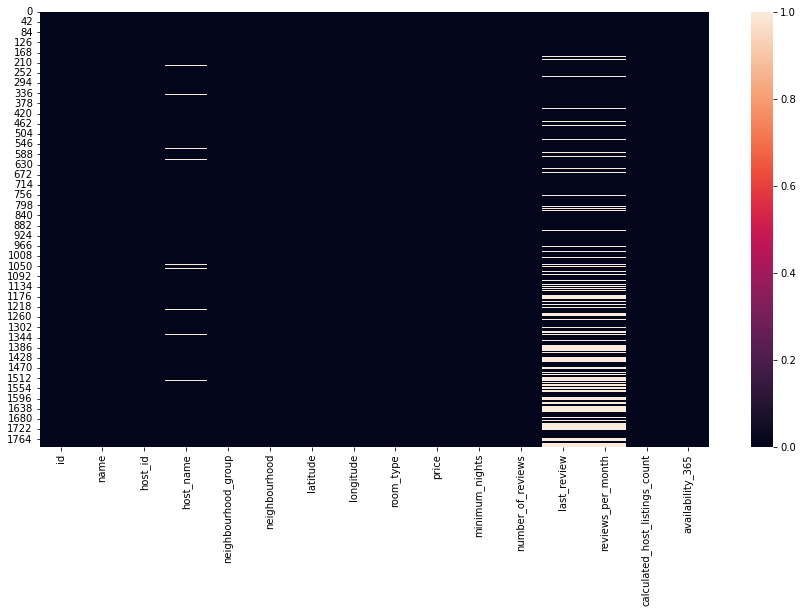

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sns.heatmap(df.isna())

**What can we analyze from the previous information?**

**Answer here**

### Numerical Values - Histograms

Previously we had been able to have a brief look at the skewness of the data. A histogram plot will allow us to see it much better. 
We can take each one of the columns that contain numbers and look it's distribution

Text(0.5, 1.0, 'Histogram of Price')

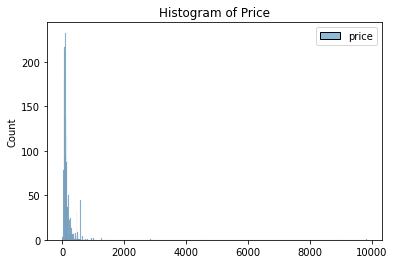

In [9]:
sns.histplot(df[['price']])
plt.title('Histogram of Price')
# plt.xlim(left = 0, right=700) We can set a limit for the axes in order to zoom on several behaiviours

**What can we analyze from the previous information?**

**Answer here**

Text(0.5, 1.0, 'Histogram of minumum amount of Nights')

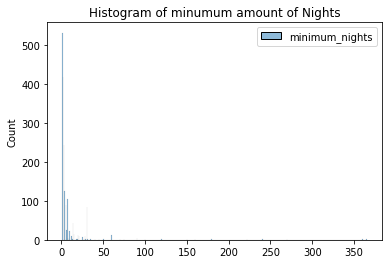

In [10]:
sns.histplot(df[['minimum_nights']])
plt.title('Histogram of minumum amount of Nights')
# plt.xlim(left = 0, right=700)

**What can we analyze from the previous information?**

**Answer here**

Text(0.5, 1.0, 'Histogram of Latitude')

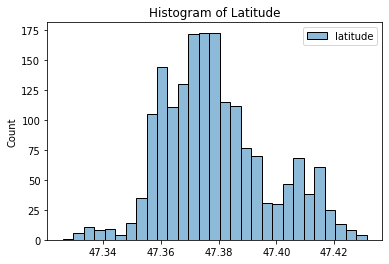

In [11]:
sns.histplot(df[['latitude']])
plt.title('Histogram of Latitude')
# plt.xlim(left = 0, right=700)

**What can we analyze from the previous information?**

**Answer here**

Text(0.5, 1.0, 'Histogram of Longitude')

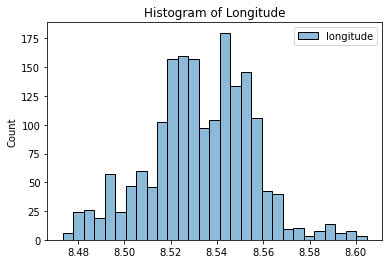

In [12]:
sns.histplot(df[['longitude']])
plt.title('Histogram of Longitude')
# plt.xlim(left = 0, right=700)

**What can we analyze from the previous information?**

**Answer here**

Text(0.5, 1.0, 'Histogram of the total number of reviews by listing')

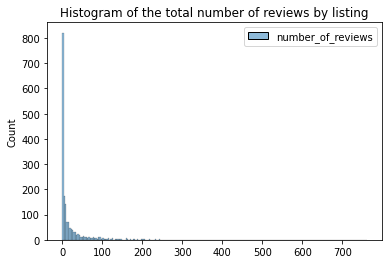

In [13]:
sns.histplot(df[['number_of_reviews']])
plt.title('Histogram of the total number of reviews by listing')
# plt.xlim(left = 0, right=700)

**What can we analyze from the previous information?**

**Answer here**

Text(0.5, 1.0, 'Histogram of the number of reviews per month by listing')

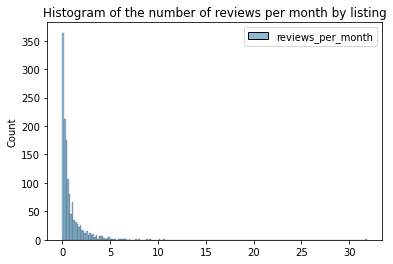

In [14]:
sns.histplot(df[['reviews_per_month']])
plt.title('Histogram of the number of reviews per month by listing')
# plt.xlim(left = 0, right=700)

**What can we analyze from the previous information?**

**Answer here**

Text(0.5, 1.0, 'Histogram of the number of rooms the host is offering in this location')

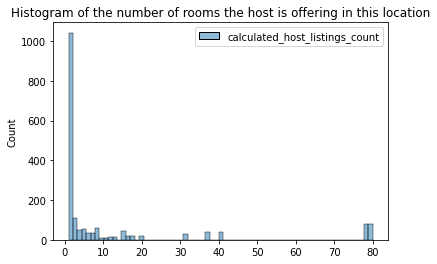

In [15]:
sns.histplot(df[['calculated_host_listings_count']])
plt.title('Histogram of the number of rooms the host is offering in this location')
# plt.xlim(left = 0, right=700)

**What can we analyze from the previous information?**

**Answer here**

Text(0.5, 1.0, 'Histogram of the amount of days that the listing if available in the future')

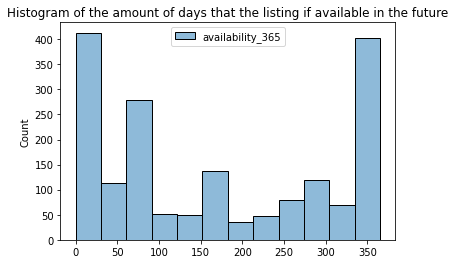

In [16]:
sns.histplot(df[['availability_365']])
plt.title('Histogram of the amount of days that the listing if available in the future')
# plt.xlim(left = 0, right=700)

**What can we analyze from the previous information?**

**Answer here**

### Text Values - WordCloud

If the data is we want to look at is plain text wit no specific structure, such as product reviews or comments, a good way to start to understand it is by looking at a [wordcloud](https://github.com/amueller/word_cloud) of the data, where the most common worlds are highlighted.
A further analysis will require techniques refering to the use Natural Language Processing (NLP) such as regular expressions [(regex)](https://docs.python.org/3/library/re.html), [NLTK](https://www.nltk.org) or [spaCy](https://spacy.io) that we do not cover on this class 

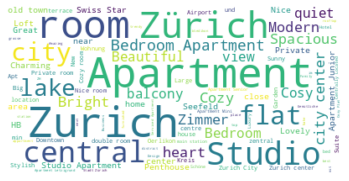

In [17]:
text = " ".join(group for group in df['name'].astype('str'))

# Create and generate a word cloud image:

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:

plt.imshow(wordcloud, interpolation='bilinear')
plt.rcParams["figure.figsize"] = (10,10)
plt.axis("off")
plt.show()

**What can we analyze from the previous information?**

**Answer here**

### Categorical Data - Manipulation and Visualization (Barplot)

When the data that we have is plain text, but it refers to different categories or descriptions that are repited several times on the column, we can define them as categorical values by setting the DataFrame column as categories 

For example, in the column Neighborhood_group, we can see that it can take only 12 different values and it classifies the listing in a specific geographical location. 

In [18]:
df['neighbourhood_group'].unique()

array(['Kreis 3', 'Kreis 2', 'Kreis 10', 'Kreis 5', 'Kreis 1', 'Kreis 9',
       'Kreis 7', 'Kreis 11', 'Kreis 4', 'Kreis 8', 'Kreis 6', 'Kreis 12'],
      dtype=object)

We can see that each value is a string

In [19]:
type(df['neighbourhood_group'][1])

str

All we have to do is to define the column as a category type column and we can see that the uniques values are converted into categories

In [20]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')

In [21]:
df['neighbourhood_group'].cat.categories

Index(['Kreis 1', 'Kreis 10', 'Kreis 11', 'Kreis 12', 'Kreis 2', 'Kreis 3',
       'Kreis 4', 'Kreis 5', 'Kreis 6', 'Kreis 7', 'Kreis 8', 'Kreis 9'],
      dtype='object')

It can also be seen in the pd.info() method

In [22]:
df[['neighbourhood_group']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood_group  1795 non-null   category
dtypes: category(1)
memory usage: 2.3 KB


This will allow us to more easily group the values into the different categories and even be able to sort them 

In [23]:
df_neighbourhood_group =df[['neighbourhood_group','id']].groupby(by='neighbourhood_group').count()
df_neighbourhood_group_sorted = df_neighbourhood_group.sort_values(by='id')
df_neighbourhood_group_sorted.reset_index(inplace=True)
df_neighbourhood_group_sorted

,neighbourhood_group,id
0,Kreis 12,32
1,Kreis 5,88
2,Kreis 10,97
3,Kreis 6,108
4,Kreis 2,125
5,Kreis 9,147
6,Kreis 1,155
7,Kreis 7,165
8,Kreis 8,177
9,Kreis 3,221


Once sorted, a barplot will be able to provide us with the category with most values and visualize the difference between them 

Text(0.5, 1.0, 'bar plot of the amount of listings located on each neighbourhood group')

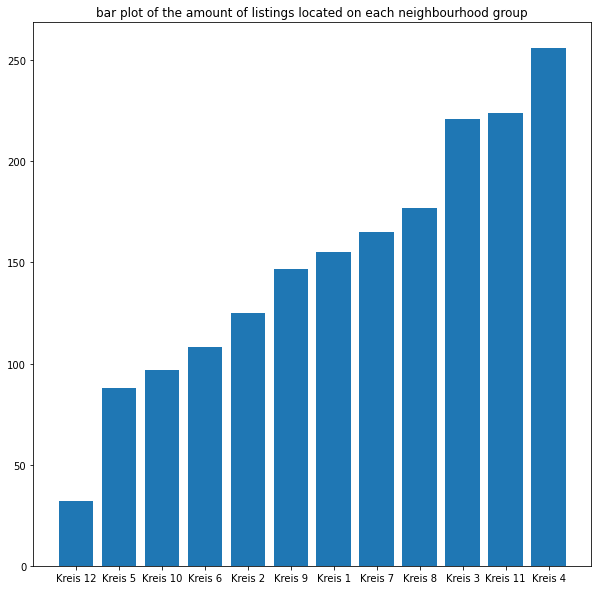

In [24]:
plt.bar(x=df_neighbourhood_group_sorted['neighbourhood_group'],height=df_neighbourhood_group_sorted['id'])
plt.title('bar plot of the amount of listings located on each neighbourhood group')


**What can we analyze from the previous information?**

**Answer here**

The same process can be applied to the Column Neighborhood

In [25]:
df['neighbourhood'].unique()

array(['Sihlfeld', 'Alt-Wiedikon', 'Enge', 'Höngg', 'Wollishofen',
       'Escher Wyss', 'Gewerbeschule', 'Rathaus', 'Hochschulen',
       'Altstetten', 'Fluntern', 'Oerlikon', 'Wipkingen', 'Hard',
       'Langstrasse', 'Friesenberg', 'Seefeld', 'Seebach', 'Weinegg',
       'Affoltern', 'Mühlebach', 'Hirslanden', 'Unterstrass',
       'Oberstrass', 'Hottingen', 'Albisrieden', 'Werd', 'Lindenhof',
       'Witikon', 'City', 'Hirzenbach', 'Schwamendingen-Mitte', 'Saatlen',
       'Leimbach'], dtype=object)

In [26]:
df['neighbourhood'] = df['neighbourhood'].astype('category')

In [27]:
df['neighbourhood'].cat.categories

Index(['Affoltern', 'Albisrieden', 'Alt-Wiedikon', 'Altstetten', 'City',
       'Enge', 'Escher Wyss', 'Fluntern', 'Friesenberg', 'Gewerbeschule',
       'Hard', 'Hirslanden', 'Hirzenbach', 'Hochschulen', 'Hottingen', 'Höngg',
       'Langstrasse', 'Leimbach', 'Lindenhof', 'Mühlebach', 'Oberstrass',
       'Oerlikon', 'Rathaus', 'Saatlen', 'Schwamendingen-Mitte', 'Seebach',
       'Seefeld', 'Sihlfeld', 'Unterstrass', 'Weinegg', 'Werd', 'Wipkingen',
       'Witikon', 'Wollishofen'],
      dtype='object')

In [28]:
df_neighbourhood =df[['neighbourhood','id']].groupby(by='neighbourhood').count()
df_neighbourhood

,id
neighbourhood,
Affoltern,31
Albisrieden,33
Alt-Wiedikon,108
Altstetten,114
City,22
Enge,72
Escher Wyss,30
Fluntern,48
Friesenberg,13


Text(0, 0.5, 'Amount of Rentals')

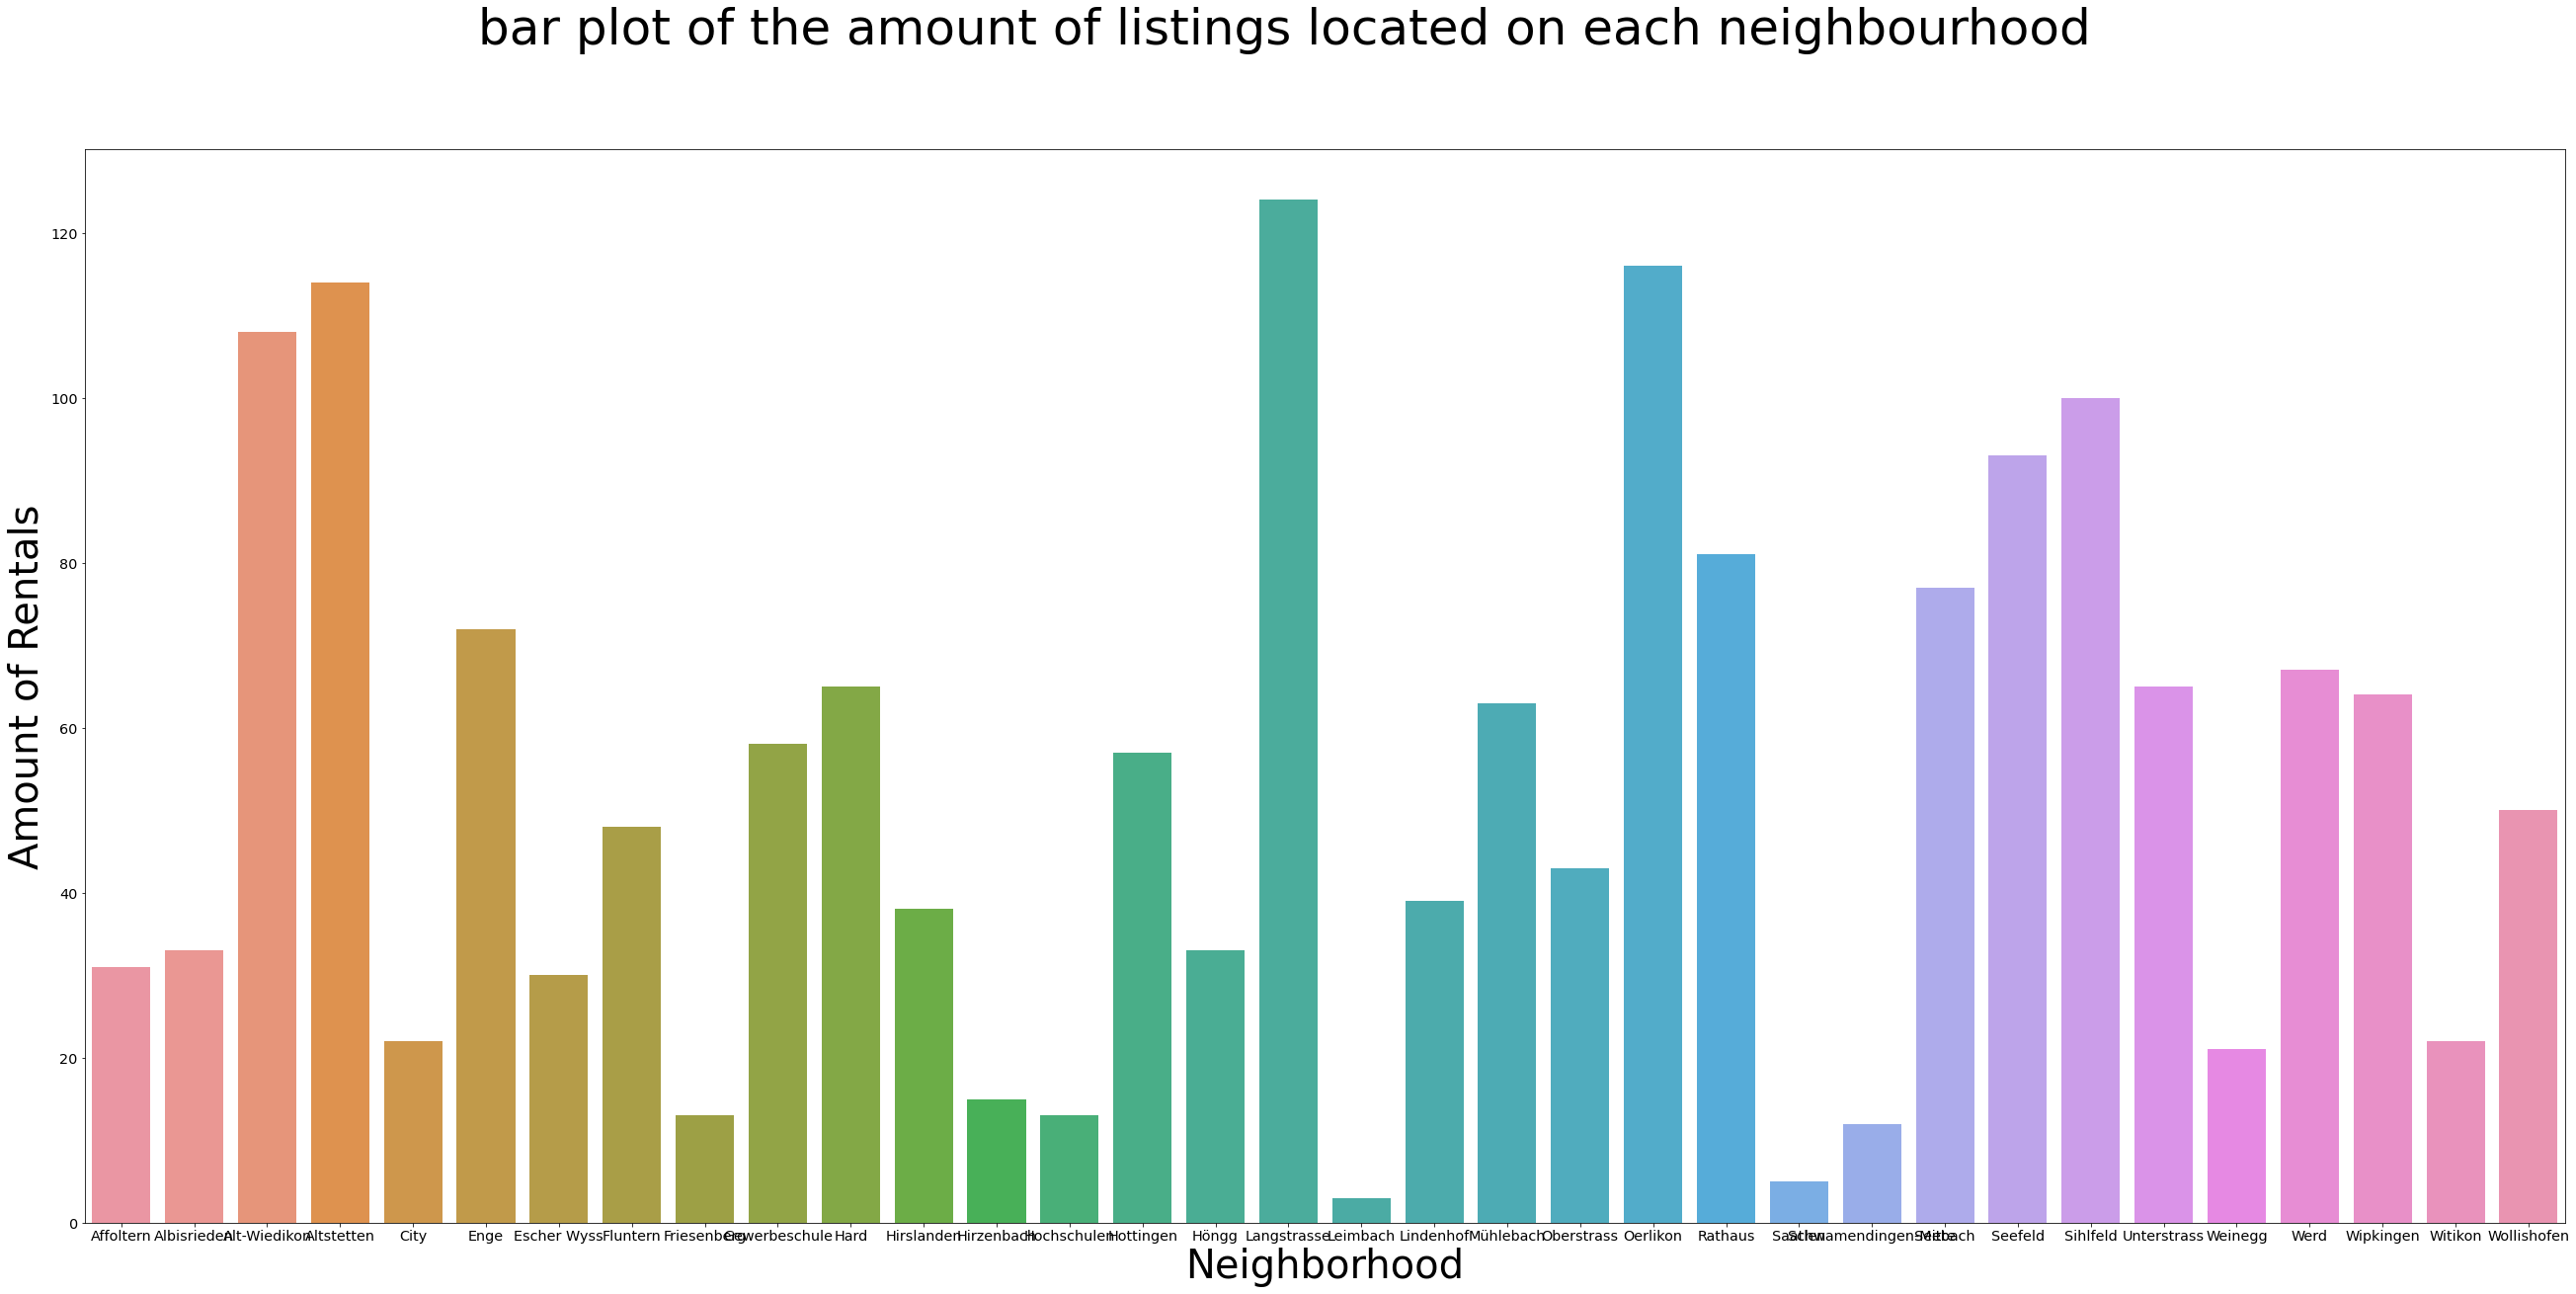

In [61]:

fig,ax = plt.subplots()
sns.barplot(x=df_neighbourhood.index,y=df_neighbourhood['id'])
fig.suptitle('bar plot of the amount of listings located on each neighbourhood', fontsize=50)
ax.set_xlabel('Neighborhood', fontsize=40)
ax.set_ylabel('Amount of Rentals', fontsize=40)



**What can we analyze from the previous information?**

**Answer here**

This graph can be ordered by the amount of listings. We would need to order the dataframe and then let the graph know that order

In [70]:
df_neighbourhood.sort_values(by='id', ascending=False,inplace=True)
df_neighbourhood

,id
neighbourhood,
Langstrasse,124
Oerlikon,116
Altstetten,114
Alt-Wiedikon,108
Sihlfeld,100
Seefeld,93
Rathaus,81
Seebach,77
Enge,72


Text(0, 0.5, 'Amount of Rentals')

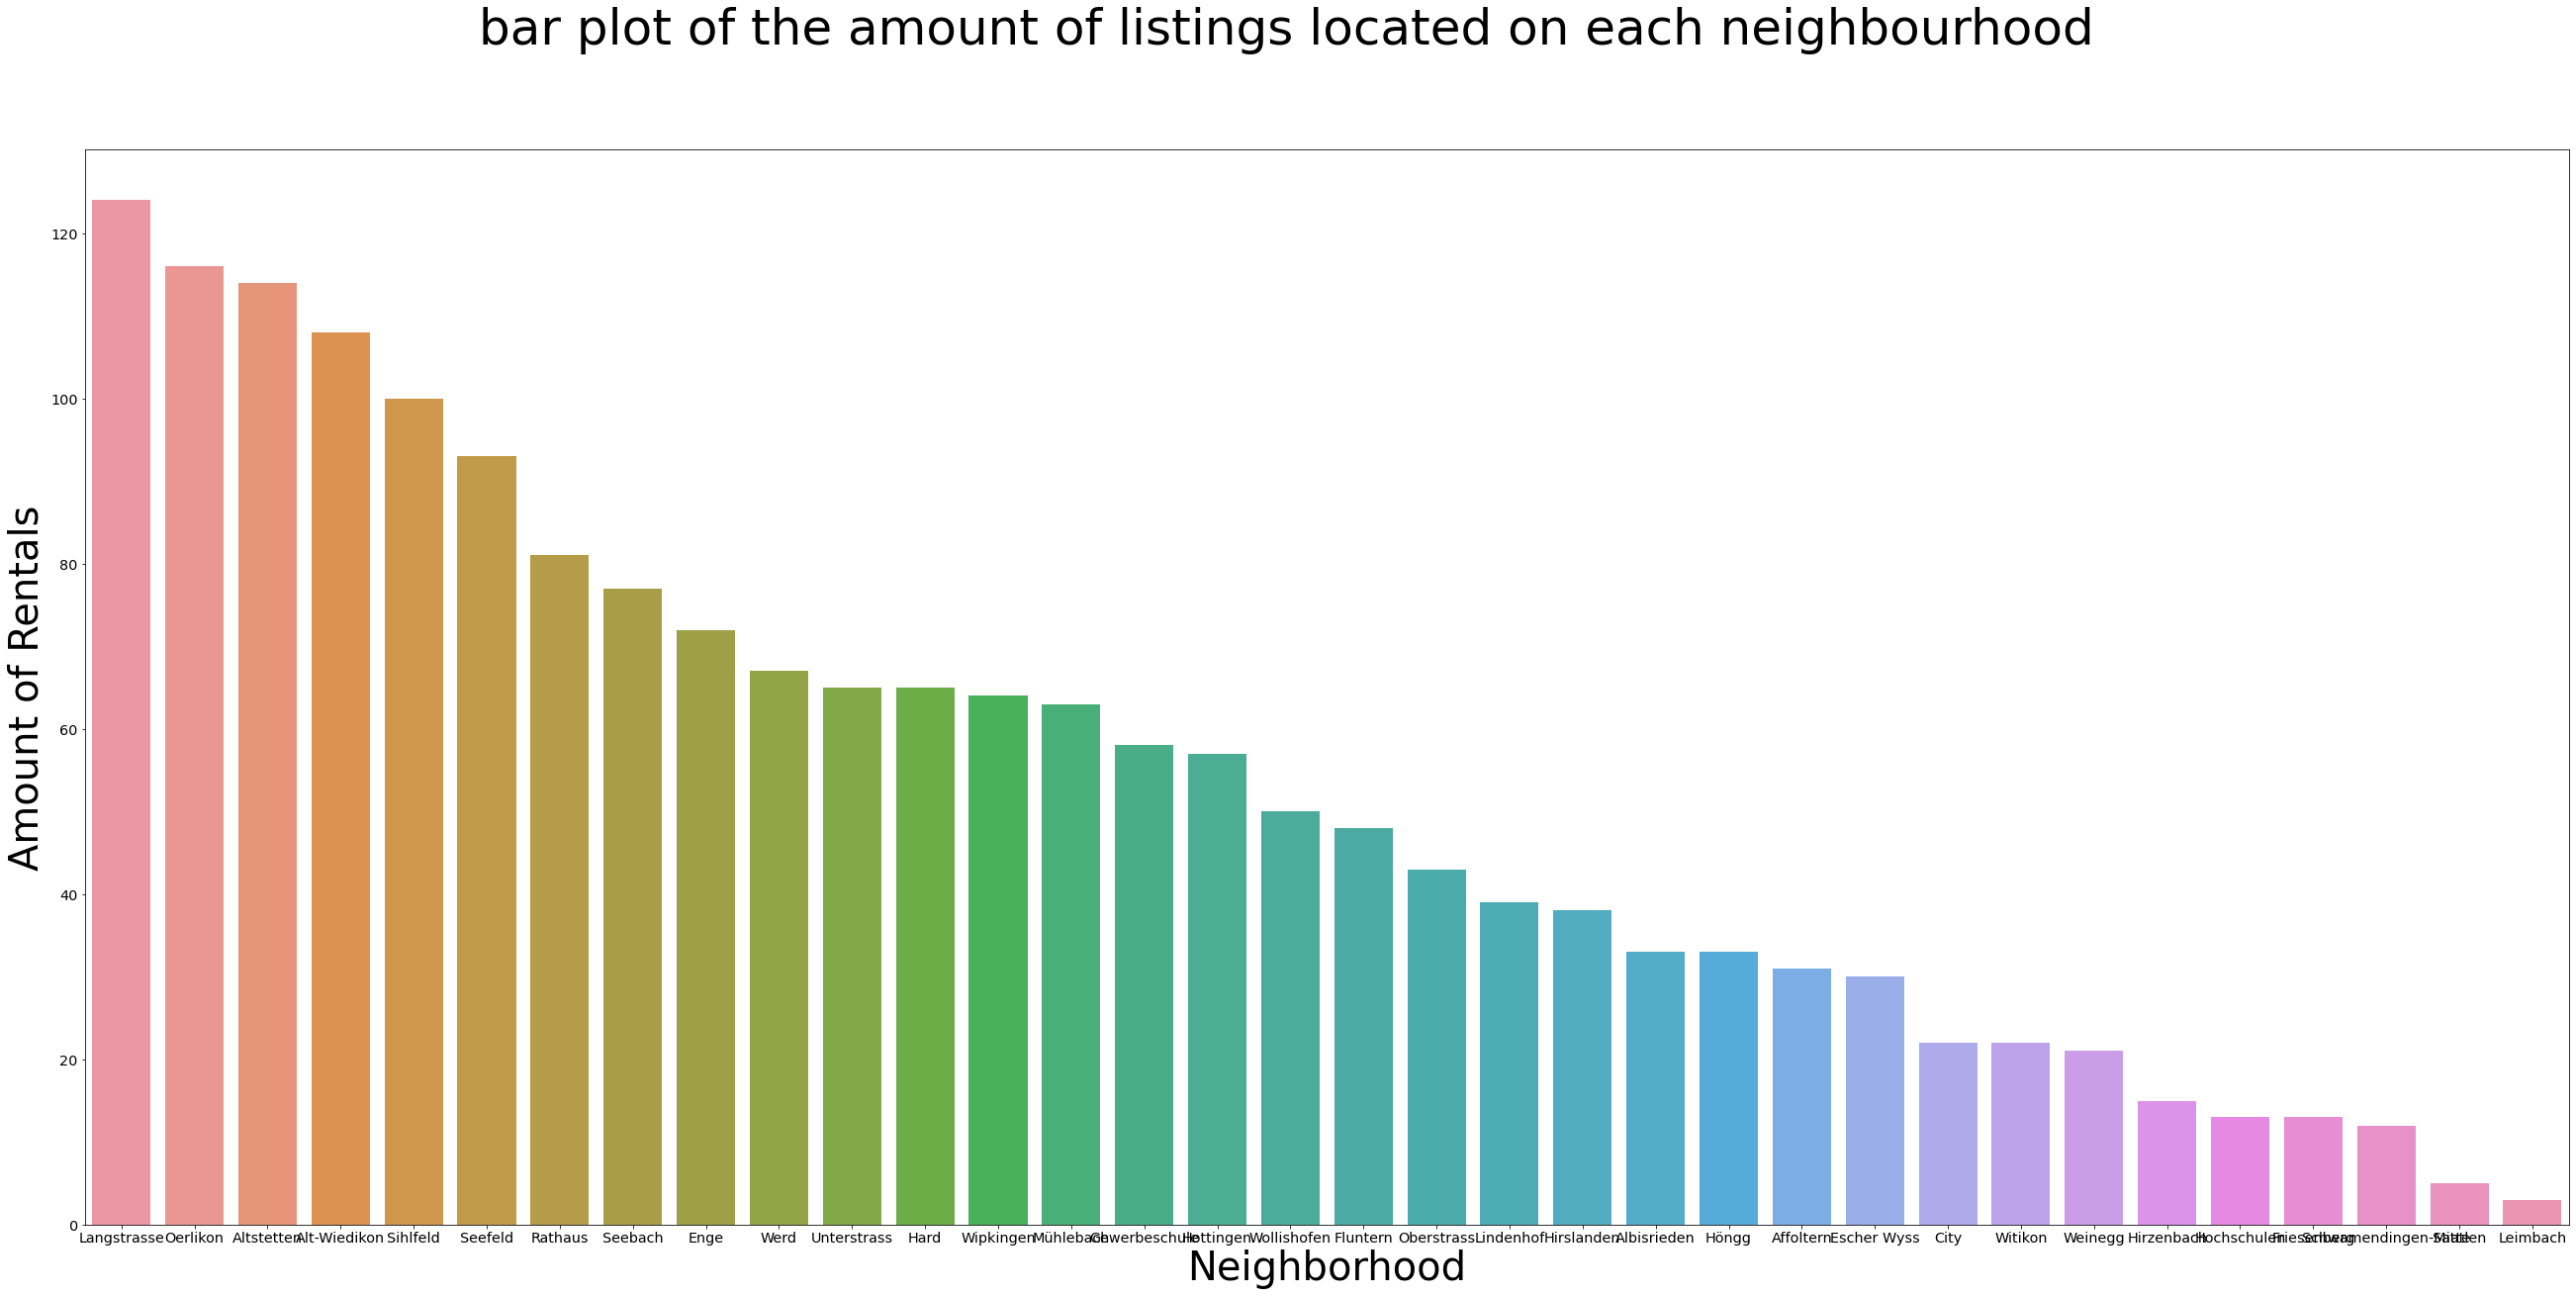

In [72]:

fig,ax = plt.subplots()
sns.barplot(x=df_neighbourhood.index,y=df_neighbourhood['id'],order=df_neighbourhood.index)
fig.suptitle('bar plot of the amount of listings located on each neighbourhood', fontsize=50)
ax.set_xlabel('Neighborhood', fontsize=40)
ax.set_ylabel('Amount of Rentals', fontsize=40)

**What can we analyze from the previous information?**

**Answer here**

And the same process can be applied to the Column room_type

In [62]:
df['room_type'].unique()

['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
Categories (4, object): ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

In [63]:
df['room_type'] = df['room_type'].astype('category')

In [32]:
df['room_type'].cat.categories

Index(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'], dtype='object')

In [33]:
df_room_type =df[['room_type','id']].groupby(by='room_type').count()
df_room_type

,id
room_type,
Entire home/apt,1177
Hotel room,11
Private room,589
Shared room,18


Text(0.5, 1.0, 'bar plot of the types of rooms avialables for rent')

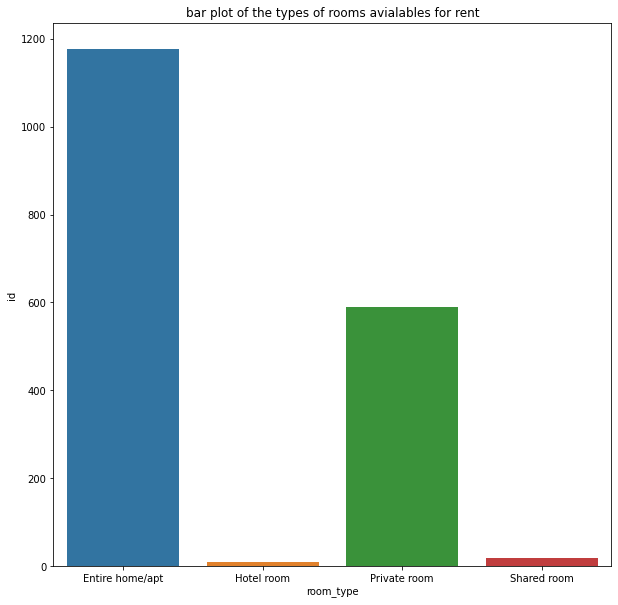

In [34]:
sns.barplot(x=df_room_type.index,y=df_room_type['id'])
plt.title('bar plot of the types of rooms avialables for rent')

**What can we analyze from the previous information?**

**Answer here**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3e4079d-b65d-4f98-a9c4-e84568c199f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>